In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('Air_Quality.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [7]:
print(df.columns.tolist())


['Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,,']


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Air_Quality.csv')  # Adjust path and delimiter as needed

# Drop non-numeric and irrelevant columns
df = df[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']]

# Handle missing or invalid values
df.replace(-200, pd.NA, inplace=True)
df.dropna(inplace=True)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

dbscan = DBSCAN(eps=1.0, min_samples=10)
labels = dbscan.fit_predict(X_scaled)
df['cluster'] = labels

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Clusters formed: {n_clusters}')
print(f'Noise points: {n_noise}')


Clusters formed: 2
Noise points: 198


In [10]:
if n_clusters > 1:
    score = silhouette_score(X_scaled, labels)
    print(f'Silhouette Score: {score:.2f}')
else:
    print("Silhouette Score not applicable (only one cluster).")

Silhouette Score: 0.26


In [11]:
for eps in [0.5, 1.0, 1.5]:
    db = DBSCAN(eps=eps, min_samples=10).fit(X_scaled)
    lbls = db.labels_
    clusters = len(set(lbls)) - (1 if -1 in lbls else 0)
    noise = list(lbls).count(-1)
    print(f'eps={eps}: clusters={clusters}, noise={noise}')

eps=0.5: clusters=3, noise=745
eps=1.0: clusters=2, noise=198
eps=1.5: clusters=1, noise=38


In [12]:
outliers = df[df['cluster'] == -1]
print("Sample outliers:")
print(outliers.head())

Sample outliers:
   CO(GT) NMHC(GT) C6H6(GT) NOx(GT) NO2(GT)     T    RH      AH  cluster
20    2.9    164.0     11.5   207.0   128.0   8.0  81.1  0.8736       -1
23    2.9    150.0     11.2   243.0   135.0   9.8  67.6  0.8185       -1
24    4.8    307.0     20.8   281.0   151.0  10.3  64.2  0.8065       -1
25    6.9    461.0     27.4   383.0   172.0   9.7  69.3  0.8319       -1
26    6.1    401.0     24.0   351.0   165.0   9.6  67.8  0.8133       -1


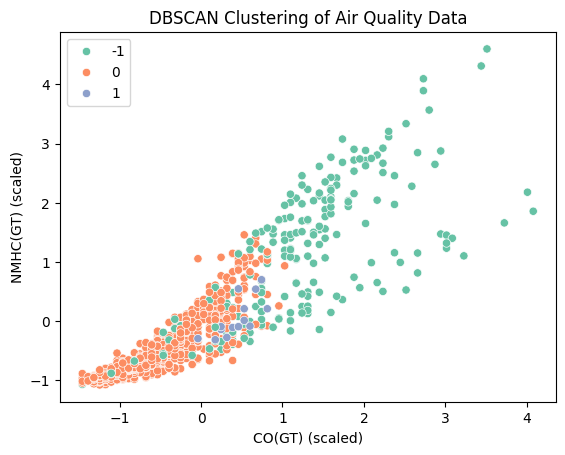

In [13]:
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='Set2')
plt.title('DBSCAN Clustering of Air Quality Data')
plt.xlabel('CO(GT) (scaled)')
plt.ylabel('NMHC(GT) (scaled)')
plt.show()